# AR(1) model

**Time-series forecasting models** are the models that are capable to predict future values based on previously observed values. 
* Time-series forecasting is widely used for non-stationary data. 
* Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time

A famous and widely used forecasting method for time-series prediction is the AutoRegressive Integrated Moving Average (ARIMA) model. ARIMA models are capable of capturing a suite of different standard temporal structures in time-series data.

# Terminology
Let’s break down these terms:

* AR: < Auto Regressive > means that the model uses the dependent relationship between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).

* I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.MA:

* MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.

# Model parameters
The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q.

p is the number of lag observations

d is the degree of differencing.

q is the size/width of the moving average window.

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as web
from datetime import datetime
import math

C:\Python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [39]:
#Loading Data
start = datetime(2020, 1, 1)
end = datetime(2021, 11, 21)
df = web.DataReader('GME', 'yahoo', start, end)
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,6.47,6.07,6.14,6.31,4453600,6.31
1,2020-01-03,6.25,5.84,6.21,5.88,3543900,5.88
2,2020-01-06,5.91,5.60,5.80,5.85,3394800,5.85
3,2020-01-07,5.83,5.44,5.77,5.52,5228000,5.52
4,2020-01-08,5.85,5.41,5.49,5.72,5629400,5.72


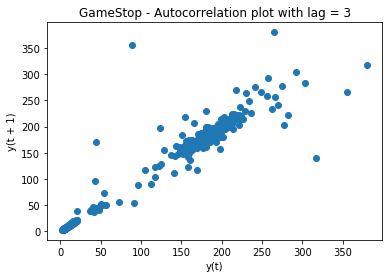

In [40]:
plt.figure()
lag_plot(df['Open'], lag=1)
plt.title('GameStop - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

Finally, let’s plot the stock price evolution over time.

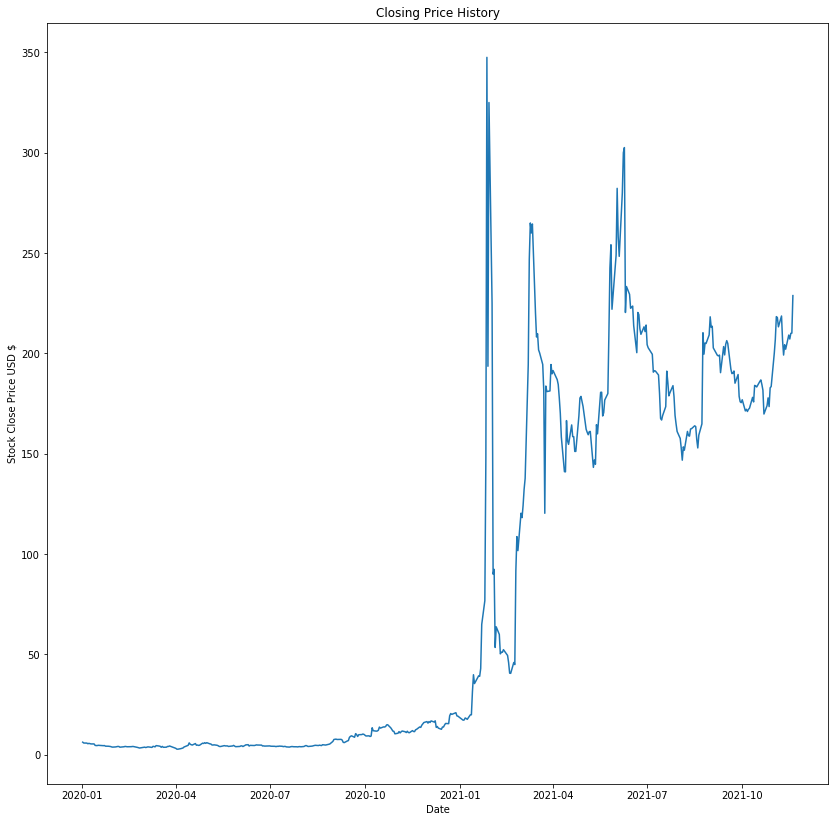

In [44]:
#visualize the closing price hostory
plt.figure(figsize=(14,14))
plt.plot(gameStop['Close'])
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Stock Close Price USD $')
plt.show()

**Build the predictive ARIMA model**

Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=1, d=0 and q=0.

In [52]:
import math
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = math.sqrt(mean_squared_error(test_data, model_predictions))
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 13.043549927408511


# Summary of the code

We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.

Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration.

Testing Mean Squared Error is 170.0594879572484

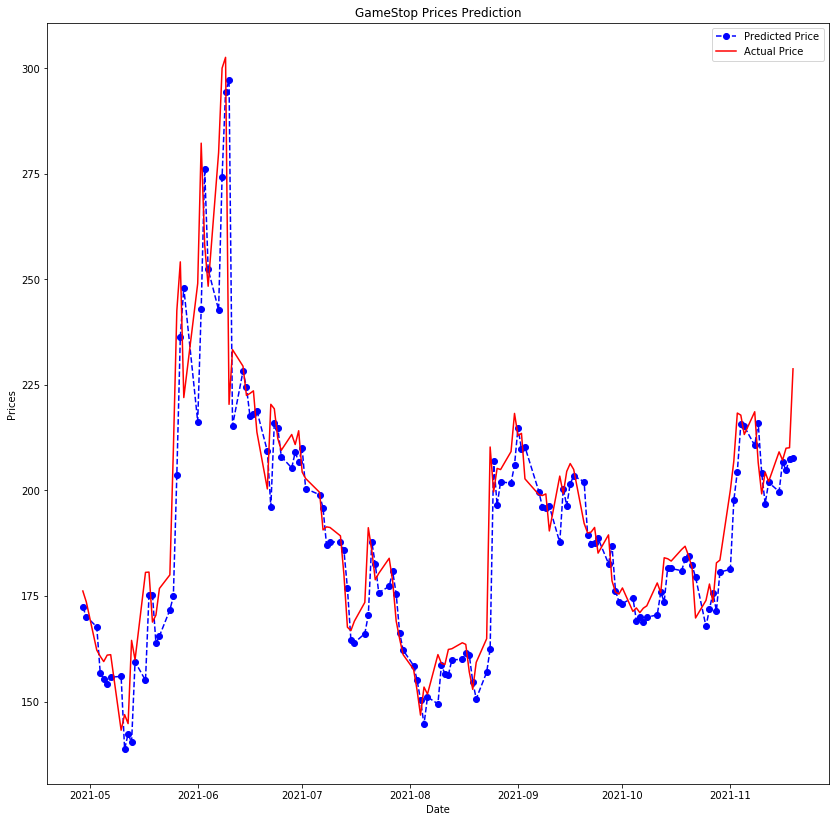

In [32]:
plt.figure(figsize=(14,14))

test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('GameStop Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.legend()
plt.show()

# Not so bad right?

Our ARIMA model results in appreciable results. This model offers a good prediction accuracy and to be relatively fast compared to other alternatives, in terms of training/fitting time and complexity.